In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [106]:
df = pd.read_csv(r"C:\Users\mark kevin\Downloads\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


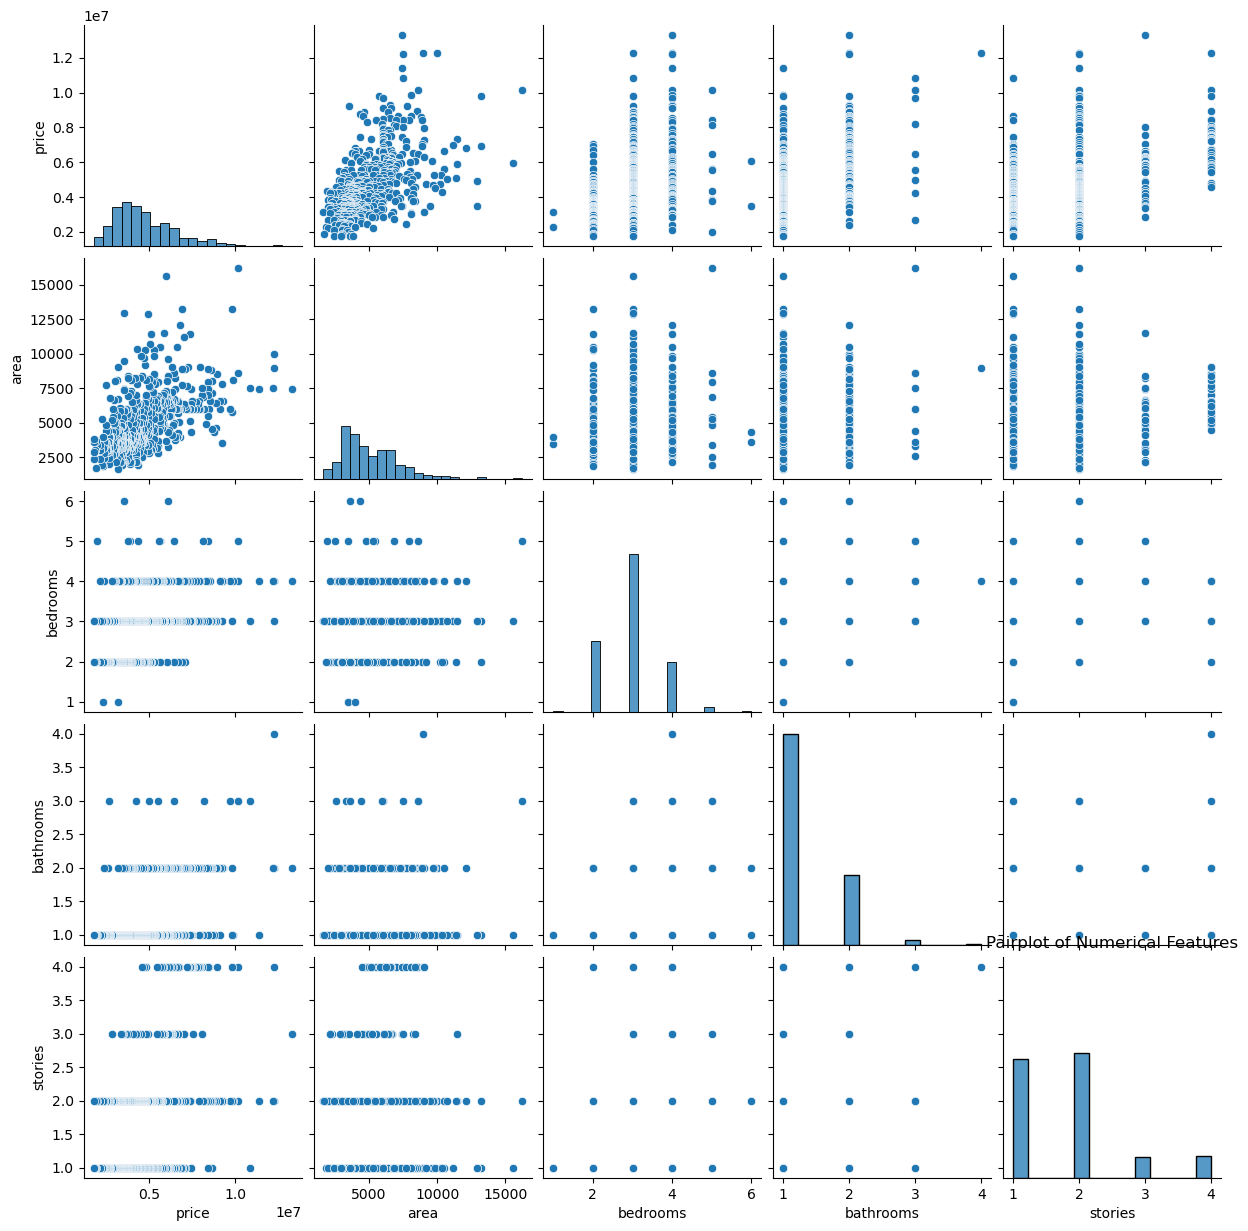

In [107]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])
plt.title('Pairplot of Numerical Features')
plt.show()

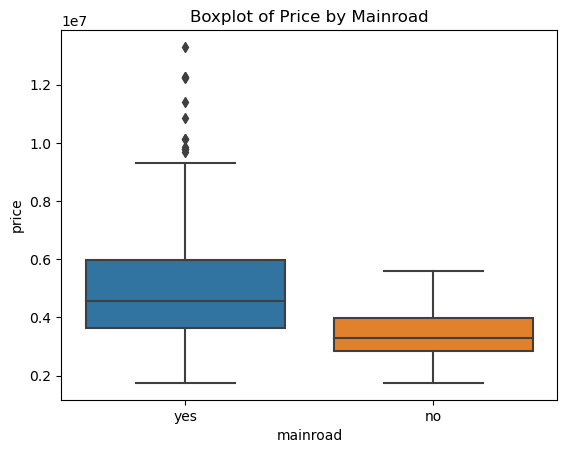

In [108]:
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Boxplot of Price by Mainroad')
plt.show()

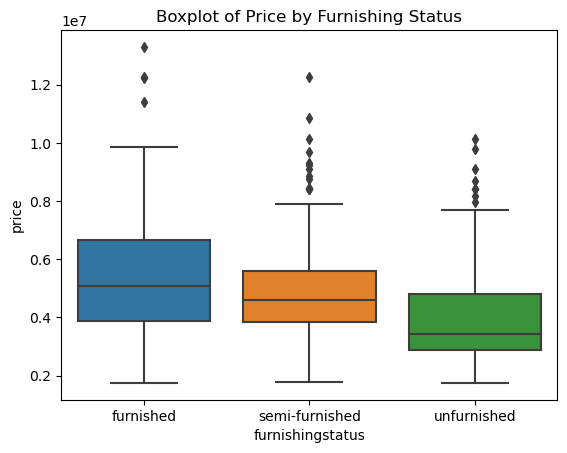

In [109]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Boxplot of Price by Furnishing Status')
plt.show()

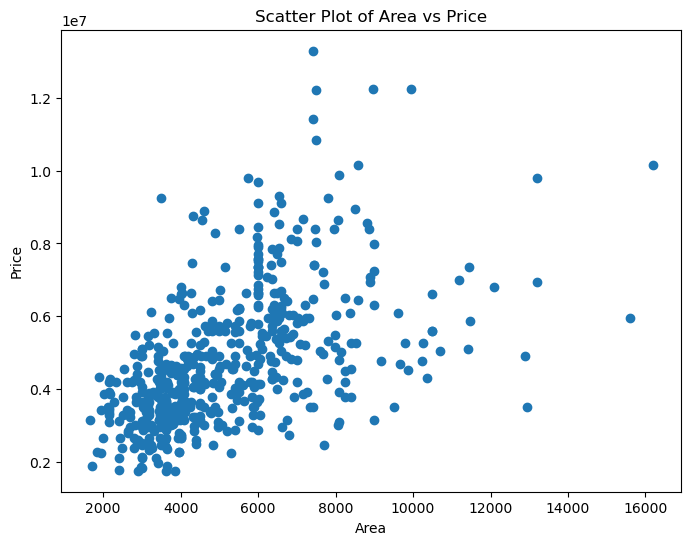

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Area vs Price')
plt.show()

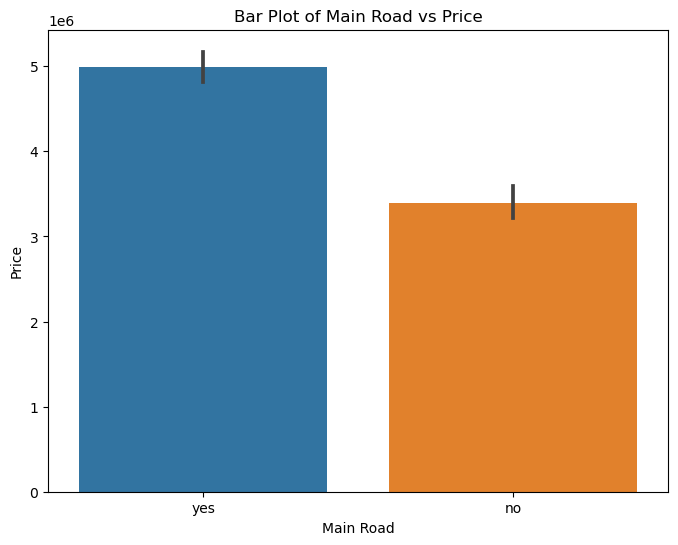

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x='mainroad', y='price', data=df)
plt.xlabel('Main Road')
plt.ylabel('Price')
plt.title('Bar Plot of Main Road vs Price')
plt.show()

C:\Users\mark kevin\AppData\Local\Temp\ipykernel_19828\3382320927.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


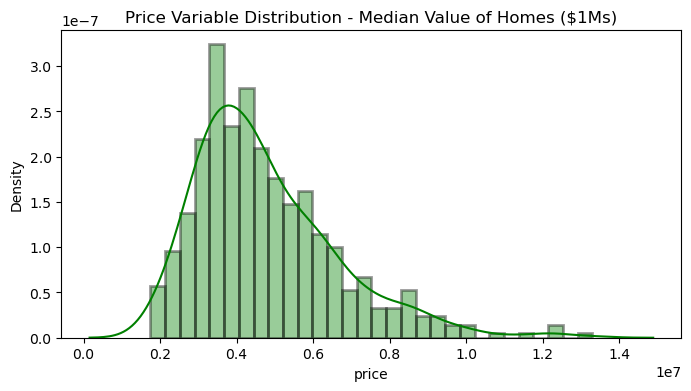

In [112]:
plt.figure(figsize=[8,4])
sns.distplot(df['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Price Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

C:\Users\mark kevin\AppData\Local\Temp\ipykernel_19828\2940438160.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


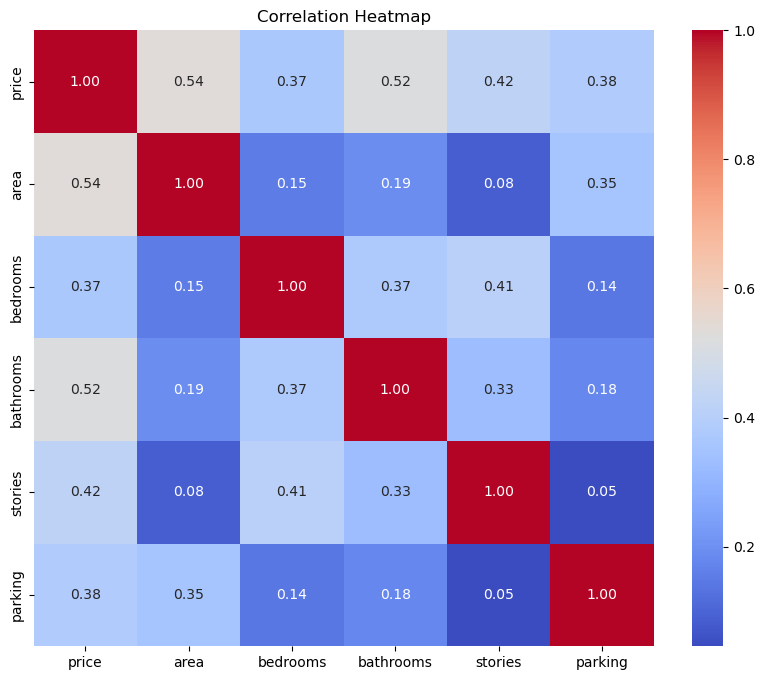

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [114]:
import numpy as np

# Calculate correlation coefficients between numerical features and price
correlations = df.corr()['price'].drop('price')  

max_corr_feature = correlations.abs().idxmax()
max_corr_value = correlations.abs().max()

print(f"The column '{max_corr_feature}' has the maximum correlation with 'price': {max_corr_value:.2f}")


The column 'area' has the maximum correlation with 'price': 0.54


C:\Users\mark kevin\AppData\Local\Temp\ipykernel_19828\259289944.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['price'].drop('price')


In [115]:
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


C:\Users\mark kevin\AppData\Local\Temp\ipykernel_19828\4224839806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_price = df.corr()['price'].sort_values(ascending=False)


In [116]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']),
                                                    df['price'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [118]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,3960,3,1,1,yes,no,no,no,no,0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
357,6930,4,1,2,no,no,no,no,no,1,no,furnished
39,6000,4,2,4,yes,no,no,no,yes,1,no,semi-furnished
54,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished


In [119]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [120]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [121]:
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']
preprocessor = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(drop='first'), columns_to_encode)
], remainder='passthrough')

In [122]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [123]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [124]:
y_pred = pipeline.predict(X_test)

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [126]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 970043.4039201637
MSE 1754318687330.7095
R2 score 0.6529242642153094


In [127]:
coef = pipeline.named_steps['regressor'].coef_
intercept = pipeline.named_steps['regressor'].intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  6.29890565e+05 -1.26881818e+05 -4.13645062e+05
  2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05]
Intercept: 260032.35760771483


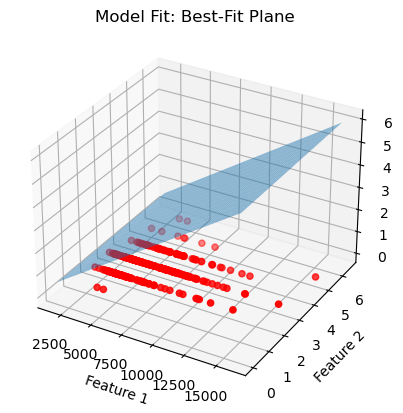

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))
zz = coef[0] * xx + coef[1] * yy + intercept

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, c='r', marker='o')

ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Price')
ax.set_title('Model Fit: Best-Fit Plane')

plt.show()

In [129]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [130]:
new_data = pd.DataFrame({
    'area': [12030],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['yes'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [1],
    'prefarea': ['yes'],
    'furnishingstatus': ['semi-furnished']
})

# Make predictions for new data
new_predictions = pipeline.predict(new_data)
print("Predicted Price for New Data:", new_predictions)

Predicted Price for New Data: [8610364.46402287]


In [131]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))